# Multi-threshold Neuron - Part 1

![model proposal comparison](images/model_proposal.png)
<sup>Figure 0. Schematic diagrams of two neuron models. (Central-threshold neuron) The model on the left is the current employed model in artifical naural networks where the input signals are propagated if there sum is above certain treshold. (Multi-threshold neuron) In contrast, in the right I show the new proposed model where each input signal goes through a threshold filter before summing them.</sup>

In this first notebook I construct and train a simple Deep Neural Network based on a novel experimental driven neuron model proposed last year in July. The notebook is separated as follows:

- Neuroscience background
    - Summarize the article that lead me to this idea and explain some of the theory.
- Concepts
    - Relate Deep Learning technical concepts to Neuroscience concepts mentioned. 
- Approximations
    - Introduce approximations I will make on the multi-threshold neuron model.
- Discussion
    - Overview of mathematical and Deep Learning implications as a consequence of the multi-threshold neuron model.
- Code
    - Tensorflow implementation and training of a simple fully-connected Deep Neural Network using the multi-threshold neuron model.

## Neuroscience background

![article_title](images/article.png)

S. Sardi *et al.* published in July last year an experimental work in [Nature scientific reports](https://www.nature.com/articles/s41598-017-18363-1) which contradicts a century old assumption about how neurons work. The work was a combined effort between the Physics, Life Sciences and Neuroscience departments of Bar-Ilan University in Tel Aviv, Israel.


The authors proposed three different neuron models which they put to the test with different types of experiments. They describe each neuron model with, what they call, *neuronal equations*.

![neuron](images/neuron.jpg)
<sup>Figure 1. Schematic representation of a neuron. The signal in a neural network flows from a neuron's axon to the dendrites of another one. That is, the signal in any neuron is incomming form its dendrites and outgoing to its axon.</sup>

**Central-threshold neuron**

This is the current adopted computational description of neurons ([artificial neurons](https://en.wikipedia.org/wiki/Artificial_neuron)), and the corner stone of Deep Learning. "A neuron consists of a unique centralized excitable mechanism". The signal reaching the neuron consists of a linear sum of the incoming signals from all the dendrites connected to the neuron, if this sum reaches a threshold, a spike signal is propagated through the axom to the other connected neurons.

The neuronal equation of this model is:

$$I = \Theta\Big(\sum_{i=1}^NW_i\cdot I_i - t\Big)$$

where
- $i$: identifies any connected neuron
- $N$: total number of connected neurons
- $W_i$: is the weight (strenght) associated to the connection with neuron $i$
- $I_i$: is the signal comming out of neuron $i$
- $t$: is the centralized single neuron threshold 
- $\Theta$: is the [heavyside step function](https://en.wikipedia.org/wiki/Heaviside_step_function)
- $I$: signal output from the neuron




**Central-multi-threshold neuron**

As for the central-threshold neuron there is a centralized threshold applied by an activation function. The difference is that this model assumess non-linearity signal transmission and a threshold unit in each dendrite. This model is the most complex of the three and its neuronal equation can be written as:

$$I=\Theta(s - t)$$
$$s = \sum_{i=1}^Nf_i(W_i\cdot I_i)\cdot\Theta(W_i\cdot I_i - t_i)$$

where
- $i$: identifies any connected neuron
- $N$: total number of connected neurons
- $W_i$: is the weight (strenght) associated to the connection with neuron $i$
- $I_i$: is the signal comming out of neuron $i$
- $t_i$: is the threshold value for each neuron $i$
- $\Theta$: is the heavyside step function
- $f_i$: non-linear transfer function for connection $i$
- $t$: is the centralized single neuron threshold 
- $I$: signal output from the neuron

**Multi-threshold neuron**

In this model the centralized threshold is removed. The neuron can be independently excited by any singal coming from a dendrite given that this signal is above a threshold. This model describes a multi-threshold neuron and the mathematical representation can be written as:

$$I=\sum_{i=1}^N\Theta(W_i\cdot I_i - t_i)$$
(here the authors write an OR, so this equation is correct if they meant the logical OR and not XOR.)

where
- $i$: identifies any connected neuron
- $N$: total number of connected neurons
- $W_i$: is the weight (strenght) associated to the connection with neuron $i$
- $I_i$: is the signal comming out of neuron $i$
- $t_i$: is the threshold value for each neuron $i$
- $\Theta$: is the heavyside step function
- $I$: signal output from the neuron

**Study conclusion**

Based on their experiments the authors conclude that the **Multi-threshold neuron** model explains the data. The authors mention that the main reason for adopting the central-threshold neuron as the main model, is that technology did not allow for direct excitation of single neurons, which other model experiments require. Moreover, they state that these results could have been discovered using technology that existed since the 1980s.

## Concepts

There are some main concepts in the Deep Learning domain that you should be familiar with before procedding. If you are familiar with them skip this part.

**Artificial neuron**

<img align='left'src="images/neuron_comparison.png" width="300px">
A mathematical representation of a biological neuron. They are the corner stone of artificial neural networks and Deep Learning. The idea is that the artificial neuron receives input signals from other connected artificial neurons and via a non-linear transmission function emits a signal itself. This transmission function is commonly known as the activation function.

**Activation function**

<img align='left'src="images/relu.png" width="300px">
The current understanding of a neuron is that it will transmit some signal only if the sum from incoming signals from other neurons exceeds a threshold. For an artificial neuron this threshold filter is applied via an activation function. There are many [activation functions](https://en.wikipedia.org/wiki/Activation_function) but the Rectified linear unit (ReLu) is recently one of the most broadly used in the Deep Learning community, and it's the one I will use in this notebook. The strict mathematical definition of the function is:

$$R(z) = max(0, z) =
     \begin{cases}
       0 &\quad\text{for } z\leq0 \\
       z &\quad\text{for } z > 0
     \end{cases}$$
     
You can check its implementation in the the official [Tensorflow source code](https://github.com/tensorflow/tensorflow/blob/48be6a56d5c49d019ca049f8c48b2df597594343/tensorflow/compiler/tf2xla/kernels/relu_op.cc#L37) or in the [Tensorflow playground code](https://github.com/tensorflow/playground/blob/718a6c8f2f876d5450b105e269534ae58e70223d/nn.ts#L120).[1]


[1]: (as you can notice the derivative is not continuous on $z=0$. Among other things, this actually caused a bit of hesitation since the most commonly used algorithm for training an artificial neural network is backpropagation, which consists on calculating gradients of all elements in the neural network.


## The challenge

My idea is to take the Decentralized-Multi-Threshold-Neuron model and try to write an Deep Learning implementation, that is a neural network which will consist of multi-threshold neurons. From the current tools available for Deep Learning Tensorflow is quite flexible and allows for writting user defined implementations, if for some reason the flexibility is not there I will have to write the neural network myself (I hope not, even though I will recommend doing this at least once to really understand how the pieces of a neural network fit togethter.).

## Approximations

![cow](images/spherical_cow.gif)

I am a theoretical physicist and as such it's impossible for me to resist the [spherical cow](https://en.wikipedia.org/wiki/Spherical_cow).

**Single threshold value**

The multi-threshold neuron model contains different threshold parameter values ($t_i$). Mathematically a threshold has the same effect if I take it as a constant and instead the input signal is moved up or down by the connecting weight parameters. Hence, the neuronal equation becomes:

$$I=\sum_{i=1}^N\Theta(W_i\cdot I_i - t)$$

(this is also happening in the current neural network implementations, since in reality there is no reason for different neurons to have the same threshold, nevertheless commonly a single activation function is used on all neurons.)

**ReLu activation function**

I'll define what in neuroscience is a transmission function. I basically will replace the heavisyde step function ($\Theta$) with threshold $t$ by a [Rectified Linear Unit](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) ($\mathcal{R}$). I write the transmission function as:

$$I=\sum_{i=1}^N\mathcal{R}(W_i\cdot I_i)$$

In general any activation function could replace the heavyside step function.

**Bias**

Notice that the proposed model equation contains no bias terms. I'll add a bias term to the equation since it's known to help neural networks fit better.

$$I=\sum_{i=1}^N\mathcal{R}(W_i\cdot I_i) + b$$

It would be nice to see if with this architecture the bias term is as important as for the central-threshold neuron model.

### Discussion

**Backpropagation**

In order for my neural network to be trained I will probably need backpropagation at some point, this means that the derivative of whatever function I introduce is necessary. Lucky for me I'm not changing the activation function itself, I can just use the already derivative of the ReLu function in Tensorflow:

$$\frac{d}{dz}\mathcal{R}(z)=
     \begin{cases}
       0 &\quad\text{for } z\leq0 \\
       1 &\quad\text{for } z > 0
     \end{cases}$$
     
You can check it out in the the official [Tensorflow source code](https://github.com/tensorflow/tensorflow/blob/48be6a56d5c49d019ca049f8c48b2df597594343/tensorflow/compiler/tf2xla/kernels/relu_op.cc#L63) or in the [Tensorflow playground code](https://github.com/tensorflow/playground/blob/718a6c8f2f876d5450b105e269534ae58e70223d/nn.ts#L121).

**Tensor multiplication**

What I'm really changing is the architecture of the artificial neural network as seen in Figure 0,  the activation function is no longer applied on the sum of all the inputs from the connected neurons, but instead on each input arriving from a connected neuron. The sum operation is going from inside the activation function to outside of it:


$$\mathcal{R}\Big(\sum_{i=1}^NW_i\cdot I_i\Big) \rightarrow \sum_{i=1}^N\mathcal{R}(W_i\cdot I_i)$$

Do you see the implementation problem described by the equation above?

In the central-threshold model (left equation) the input to the activation function $\sum_iW_i\cdot I_i$ is exactly the dot product between vectors $(W_1, W_2,\dots,W_N)$ and $(I_1, I_2,\dots,I_N)$ and it's this fact which allows fast computation of input signals for many neurons via matrix multiplication. In a fully connected layer architecture for example, the input signal to neuron $j$ comming from connected neurons $i$ is $\sum_i I_i\cdot W_{ij}$, which means I can calculate the input signal for all $j$ neurons with a single matrix multiplication $I \cdot W$.

In the multi-threshold model this is no longer possible. I think this will be the biggest challenge, but AFAIK Tensorflow should provide enough flexibility to write this architecture. The idea is to keep things in the tensorflow world as all the functions in the package can be added to calculations and gradients will be automatically available for backpropagation[^2].

[^2]: It is also interesting to think about if the fact that we can do fast matrix multiplications lead us to computationaly prefer the current central-threshold model, like the modified Maslow's hammer saying goes "if all you have is a hammer, everything looks like a nail".

**Example**

Suppose I have the following weight matrix connecting two neuron layers, the first layer has 3 neurons the second with 2:

$$W=
\begin{bmatrix}
    3 & -4 \\
    -2& 2\\
    0& 4
\end{bmatrix}
$$

and that the output signal from the neurons in the first layer are

$$I_0=
\begin{bmatrix}
    2 & 5 & 1  
\end{bmatrix}
$$

with bias terms

$$b=
\begin{bmatrix}
    2 & -1  
\end{bmatrix}
$$

Using the standard central-threshold neuron model the output signal of the second layer is:

$$\mathcal{R}\Big(I_0\cdot W + b\Big) = \mathcal{R}\Big(
\begin{bmatrix}
    2 & 5 & 1  
\end{bmatrix}
\cdot
\begin{bmatrix}
    3 & -4 \\
    -2& 2\\
    0& 4
\end{bmatrix}
+
\begin{bmatrix}
    2 & -1  
\end{bmatrix}
\Big)
=
\mathcal{R}\Big(
\begin{bmatrix}
    -2 & 5 
\end{bmatrix}
\Big)
=
\begin{bmatrix}
    \mathcal{R}(-2)& \mathcal{R}(5)
\end{bmatrix}
\Big)
=
\begin{bmatrix}
    0 & 5
\end{bmatrix}
$$

In the case of the multi-threshold neuron model proposed the output is

$$\mathcal{R}\Big(
\begin{bmatrix}
    2 & 5 & 1  
\end{bmatrix}
\bigcirc
\begin{bmatrix}
    3 & -4 \\
    -2& 2\\
    0& 4
\end{bmatrix}
\Big)
+
\begin{bmatrix}
    2 & -1  
\end{bmatrix}
=
\begin{bmatrix}
    \mathcal{R}(6) + \mathcal{R}(-10) + \mathcal{R}(0) + 2 & \mathcal{R}(-8) + \mathcal{R}(10) + \mathcal{R}(4)  -1
\end{bmatrix}
=
\begin{bmatrix}
    8 & 13 
\end{bmatrix}
$$

Here I have abused the symbols but the operation $\bigcirc$ in combination with $\mathcal{R}$ represent the non-linear transmission function of the multi-threshold neuron model.

As the example shows, a fundamental difference is that in the multi-threshold case if any term (neuron output signal times weight) is positive then the output will be positive. This will greatly reduce the sparsity of the neurons firing throughout the network in comparison with the conventional central-threshold model.

I don't know all the implications but I expect that it will be more difficult for individual neurons (or parts of the network) to singly address a specific feature, therefore reducing overfitting. Something similar is achieved in current Deep Neural Networks using the [Drop Out technique](https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout).

A known issue of most activation functions in Deep Neural Networks is the "vanishing gradient problem", it relates to the decreasing update value to the weights as the errors propagate through the network via backpropagation. In the standard central-threshold model the ReLu partially solves this problem by having a derivative equal to 1 if the neuron fires, this propagates the error without vanishing the gradient. On the other hand, if the neuron signal is negative and squashed by the ReLu (did not fire) the corresponding weights are not updated, since the ReLu derivate is zero i.e. neuron connections are not learning when they didn't fire but perhaps they shold have. In the multi-threshold model I expect this last issue to be reduced since sparsity reduces, more weights should be updated on each step in comparison with the central-threshold neuron.

## Code

Tensorflow contains the built-in realted `ReLu` functions:

- `relu_layer`
- `relu`

The `relu_layer` function already assumes an architecture with central-threshold neurons. The `relu` function on the other hand can operate on each entry of a tensor.

**Replicating the example**

In [1]:
import numpy as np
np.random.seed(21)
import tensorflow as tf
tf.set_random_seed(21)

from tensorflow.examples.tutorials.mnist import input_data

/home/rodrigo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


**Central-threshold Neuron**

In [2]:
b = tf.constant([2, -1])
w = tf.constant([[3, -4], [-2, 2], [0, 4]])
I_0 = tf.constant([[2, 5, 1]])
I_1 = tf.nn.relu(tf.matmul(I_0, w) + b)
I_1.eval(session=tf.Session())

array([[0, 5]], dtype=int32)

**Multi-threshold Neuron**

In [3]:
b = tf.constant([2, -1])
w = tf.constant([[3, -2, 0], [-4, 2, 4]])
I_0 = tf.constant([2, 5, 1])
I_1 = tf.reduce_sum(tf.nn.relu(tf.multiply(I_0, w)), axis=1) + b
I_1.eval(session=tf.Session())

array([ 8, 13], dtype=int32)

**Replicating example**

```python
import tensorflow as tf
sess = tf.Session()

b = tf.constant([2, -1])
w = tf.constant([[3, -2, 0], [-4, 2, 4]])
I_0 = tf.constant([2, 5, 1])
I_1 = tf.reduce_sum(tf.nn.relu(tf.multiply(I_0, w)), axis=1) + b
I_1.eval(session=sess)
>>> array([ 8, 13], dtype=int32)
```

Notice that `b` and `I_0` are one dimensional tensors, this allows me to take advantage of the tensorflow broadcasting feature and simplify the code necessary to perform the non-linear operation for the multi-threshold neuron model. Using the example I can then define a neural network layer consisting of multi-threshold neurons[^3].

```python
def multi_threshold_neuron_layer(input_values, weights, b, activation=tf.nn.relu, output_layer=False):
    return tf.reduce_sum(activation(tf.multiply(input_values, weights)), axis=1) + b
```

[3]: Is a one line function, i know i know, but I can already sense there will be more to it later since this just works for a single input example.

## MNIST - 2 hidden layer multi-threshold neural network

With this basic implementation my goal was just to see the model be able to train, I just wanted to see the loss decrease with each iteration. As you probably noticed, the `multi_threshold_neuron_layer` can only take 1 example at a time, this is the complication when I said that simple matrix multiplication was no longer possible. I expect to extend this code in notebook part II to be able to receive batches thought.

In [4]:
def multi_threshold_neuron_layer(input_values, weights, b, activation=tf.nn.relu, output_layer=False):
    return tf.reduce_sum(activation(tf.multiply(input_values, weights)), axis=1) + b

In [5]:
def train_model(output_layer, target, dataset, n_epochs, n_examples, learning_rate, display_iter, session=None, multi_threshold=False):
    
    print('\nNr. Examples in Epoch:', n_examples)
    print('Nr. Epochs:', n_epochs)
    print('Learning Rate:', learning_rate)

    # loss, optimizer and assessing prediction
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=target))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
    correct_prediction = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output_layer, 1), tf.argmax(target, 1)), "float"))

    # Initializing variables
    init = tf.global_variables_initializer()
    
    losses = []
    accuracies = []

    with session or tf.Session() as sess:
        sess.run(init)

        # Training cycle
        for epoch in range(n_epochs):
            avg_loss = acc = 0
            # Loop over all examples
            for i in range(n_examples):
                x, y = mnist.train.next_batch(1, shuffle=True) # single example
                _, l, c, o = sess.run([optimizer, loss, correct_prediction, output],
                                   feed_dict={I_0: x[0] if multi_threshold else x, 
                                              target: y})
                avg_loss += l
                acc += c
                if (i + 1) % display_iter == 0:
                    losses.append(avg_loss / display_iter)
                    accuracies.append(acc / display_iter)
                    avg_loss = acc = 0
                    print(f'Epoch: {epoch + 1}/{n_epochs}\tStep:{i + 1:05d}/{n_examples}\tAvg Loss: {losses[-1]:.3f}\tAccuracy: {accuracies[-1]:.3f}')
        print("Optimization Finished!")

        # Test metrics
        test_accuracy = 0
        for i in range(mnist.test.num_examples):
            x_test, y_test = mnist.test.next_batch(1)
            test_accuracy += correct_prediction.eval({I_0: x_test[0] if multi_threshold else x_test, 
                                                      target: y_test})
        test_accuracy /= (i + 1)
        print(f"Accuracy on test set: {test_accuracy:.3f}")
        
        return losses, accuracies, test_accuracy

Let's download the MNIST data

In [42]:
# Architecture
n_input = 784 # 28 x 28
hlayers_sizes = [251, 87]
n_classes = 10 # 0-9 digits

# Parameters
learning_rate = 0.01
n_epochs = 4

# data
mnist = input_data.read_data_sets("/tmp", one_hot=True)
n_examples = mnist.train.num_examples
display_iter = n_examples // 50

n_examples, display_iter

Extracting /tmp/train-images-idx3-ubyte.gz
Extracting /tmp/train-labels-idx1-ubyte.gz
Extracting /tmp/t10k-images-idx3-ubyte.gz
Extracting /tmp/t10k-labels-idx1-ubyte.gz


(55000, 1100)

In [43]:
# Construct model
I_0 = tf.placeholder("float", shape=(n_input,)) # input layer

W_01 = tf.Variable(tf.random_normal((hlayers_sizes[0], n_input)))
b_1 = tf.Variable(tf.random_normal((hlayers_sizes[0],)))
I_1 = multi_threshold_neuron_layer(I_0, W_01, b_1) # 1st hidden layer

W_12 = tf.Variable(tf.random_normal((hlayers_sizes[1], hlayers_sizes[0])))
b_2 = tf.Variable(tf.random_normal((hlayers_sizes[1],)))
I_2 = multi_threshold_neuron_layer(I_1, W_12, b_2) # 2nd hidden layer

W_23 = tf.Variable(tf.random_normal((n_classes, hlayers_sizes[1])))
b_3 = tf.Variable(tf.random_normal((n_classes,)))
output = tf.transpose(tf.matmul(W_23, tf.reshape(I_2, shape=(-1, 1)))) + b_3 # output layer

# truth
target = tf.placeholder("float", shape=(1, n_classes))

In [44]:
losses, accuracies, test_accuracy = train_model(output, target, mnist, n_epochs, n_examples, learning_rate, display_iter, multi_threshold=True)

import json
data_multi = {
    'n_examples': n_examples,
    'n_epochs': n_epochs,
    'learning_rate': learning_rate,
    'losses': losses,
    'accuracies': accuracies,
    'accuracy': test_accuracy
}

with open(f'run_multi_{learning_rate}.json', 'w') as f:
    json.dump(data_multi, f)


Nr. Examples in Epoch: 55000
Nr. Epochs: 4
Learning Rate: 0.01
Epoch: 1/4	Step:01100/55000	Avg Loss: 3430.757	Accuracy: 0.403
Epoch: 1/4	Step:02200/55000	Avg Loss: 856.595	Accuracy: 0.627
Epoch: 1/4	Step:03300/55000	Avg Loss: 513.171	Accuracy: 0.689
Epoch: 1/4	Step:04400/55000	Avg Loss: 326.193	Accuracy: 0.738
Epoch: 1/4	Step:05500/55000	Avg Loss: 228.613	Accuracy: 0.780
Epoch: 1/4	Step:06600/55000	Avg Loss: 188.125	Accuracy: 0.780
Epoch: 1/4	Step:07700/55000	Avg Loss: 137.363	Accuracy: 0.806
Epoch: 1/4	Step:08800/55000	Avg Loss: 112.812	Accuracy: 0.825
Epoch: 1/4	Step:09900/55000	Avg Loss: 131.984	Accuracy: 0.795
Epoch: 1/4	Step:11000/55000	Avg Loss: 134.456	Accuracy: 0.801
Epoch: 1/4	Step:12100/55000	Avg Loss: 100.324	Accuracy: 0.810
Epoch: 1/4	Step:13200/55000	Avg Loss: 104.753	Accuracy: 0.802
Epoch: 1/4	Step:14300/55000	Avg Loss: 90.726	Accuracy: 0.841
Epoch: 1/4	Step:15400/55000	Avg Loss: 89.832	Accuracy: 0.802
Epoch: 1/4	Step:16500/55000	Avg Loss: 82.491	Accuracy: 0.820
Epoch: 1

Epoch: 3/4	Step:39600/55000	Avg Loss: 1.009	Accuracy: 0.819
Epoch: 3/4	Step:40700/55000	Avg Loss: 0.945	Accuracy: 0.846
Epoch: 3/4	Step:41800/55000	Avg Loss: 1.084	Accuracy: 0.830
Epoch: 3/4	Step:42900/55000	Avg Loss: 0.939	Accuracy: 0.830
Epoch: 3/4	Step:44000/55000	Avg Loss: 0.967	Accuracy: 0.822
Epoch: 3/4	Step:45100/55000	Avg Loss: 1.041	Accuracy: 0.822
Epoch: 3/4	Step:46200/55000	Avg Loss: 1.060	Accuracy: 0.821
Epoch: 3/4	Step:47300/55000	Avg Loss: 1.244	Accuracy: 0.803
Epoch: 3/4	Step:48400/55000	Avg Loss: 0.964	Accuracy: 0.822
Epoch: 3/4	Step:49500/55000	Avg Loss: 1.005	Accuracy: 0.825
Epoch: 3/4	Step:50600/55000	Avg Loss: 1.003	Accuracy: 0.830
Epoch: 3/4	Step:51700/55000	Avg Loss: 0.947	Accuracy: 0.821
Epoch: 3/4	Step:52800/55000	Avg Loss: 1.103	Accuracy: 0.813
Epoch: 3/4	Step:53900/55000	Avg Loss: 0.945	Accuracy: 0.838
Epoch: 3/4	Step:55000/55000	Avg Loss: 1.088	Accuracy: 0.825
Epoch: 4/4	Step:01100/55000	Avg Loss: 0.838	Accuracy: 0.833
Epoch: 4/4	Step:02200/55000	Avg Loss: 0.

**central-threshold neural netowrk**

In [45]:
# Construct model
I_0 = tf.placeholder("float", shape=(1, n_input)) # input layer

W_01 = tf.Variable(tf.random_normal((n_input, hlayers_sizes[0])))
b_1 = tf.Variable(tf.random_normal((hlayers_sizes[0],)))
I_1 = tf.nn.relu_layer(I_0, W_01, b_1) # 1st hidden layer

W_12 = tf.Variable(tf.random_normal((hlayers_sizes[0], hlayers_sizes[1])))
b_2 = tf.Variable(tf.random_normal((hlayers_sizes[1],)))
I_2 = tf.nn.relu_layer(I_1, W_12, b_2) # 2nd hidden layer

W_23 = tf.Variable(tf.random_normal((hlayers_sizes[1], n_classes)))
b_3 = tf.Variable(tf.random_normal((n_classes,)))
output = tf.matmul(I_2, W_23) + b_3 # output layer

# truth
target = tf.placeholder("float", shape=(1, n_classes))

In [46]:
losses, accuracies, test_accuracy = train_model(output, target, mnist, n_epochs, n_examples, learning_rate, display_iter, multi_threshold=False)

import json
data_central = {
    'n_examples': n_examples,
    'n_epochs': n_epochs,
    'learning_rate': learning_rate,
    'losses': losses,
    'accuracies': accuracies,
    'accuracy': test_accuracy
}

with open(f'run_central_{learning_rate}.json', 'w') as f:
    json.dump(data_central, f)


Nr. Examples in Epoch: 55000
Nr. Epochs: 4
Learning Rate: 0.01
Epoch: 1/4	Step:01100/55000	Avg Loss: 119.006	Accuracy: 0.626
Epoch: 1/4	Step:02200/55000	Avg Loss: 16.326	Accuracy: 0.539
Epoch: 1/4	Step:03300/55000	Avg Loss: 2.471	Accuracy: 0.253
Epoch: 1/4	Step:04400/55000	Avg Loss: 2.321	Accuracy: 0.139
Epoch: 1/4	Step:05500/55000	Avg Loss: 2.363	Accuracy: 0.142
Epoch: 1/4	Step:06600/55000	Avg Loss: 2.541	Accuracy: 0.136
Epoch: 1/4	Step:07700/55000	Avg Loss: 2.261	Accuracy: 0.130
Epoch: 1/4	Step:08800/55000	Avg Loss: 2.243	Accuracy: 0.135
Epoch: 1/4	Step:09900/55000	Avg Loss: 2.421	Accuracy: 0.100
Epoch: 1/4	Step:11000/55000	Avg Loss: 2.381	Accuracy: 0.115
Epoch: 1/4	Step:12100/55000	Avg Loss: 2.308	Accuracy: 0.098
Epoch: 1/4	Step:13200/55000	Avg Loss: 2.307	Accuracy: 0.103
Epoch: 1/4	Step:14300/55000	Avg Loss: 2.313	Accuracy: 0.095
Epoch: 1/4	Step:15400/55000	Avg Loss: 2.309	Accuracy: 0.095
Epoch: 1/4	Step:16500/55000	Avg Loss: 2.514	Accuracy: 0.105
Epoch: 1/4	Step:17600/55000	Avg L

Epoch: 3/4	Step:40700/55000	Avg Loss: 2.309	Accuracy: 0.108
Epoch: 3/4	Step:41800/55000	Avg Loss: 2.313	Accuracy: 0.092
Epoch: 3/4	Step:42900/55000	Avg Loss: 2.309	Accuracy: 0.111
Epoch: 3/4	Step:44000/55000	Avg Loss: 2.309	Accuracy: 0.108
Epoch: 3/4	Step:45100/55000	Avg Loss: 2.312	Accuracy: 0.101
Epoch: 3/4	Step:46200/55000	Avg Loss: 2.308	Accuracy: 0.104
Epoch: 3/4	Step:47300/55000	Avg Loss: 2.310	Accuracy: 0.103
Epoch: 3/4	Step:48400/55000	Avg Loss: 2.311	Accuracy: 0.104
Epoch: 3/4	Step:49500/55000	Avg Loss: 2.310	Accuracy: 0.103
Epoch: 3/4	Step:50600/55000	Avg Loss: 2.308	Accuracy: 0.110
Epoch: 3/4	Step:51700/55000	Avg Loss: 2.313	Accuracy: 0.081
Epoch: 3/4	Step:52800/55000	Avg Loss: 2.310	Accuracy: 0.106
Epoch: 3/4	Step:53900/55000	Avg Loss: 2.307	Accuracy: 0.098
Epoch: 3/4	Step:55000/55000	Avg Loss: 2.309	Accuracy: 0.095
Epoch: 4/4	Step:01100/55000	Avg Loss: 2.308	Accuracy: 0.107
Epoch: 4/4	Step:02200/55000	Avg Loss: 2.307	Accuracy: 0.115
Epoch: 4/4	Step:03300/55000	Avg Loss: 2.

## Run summary

In [46]:
import json
from glob import glob
from collections import namedtuple

RunSummary = namedtuple('RunSummary', ['type', 'data'])

summaries = []
print('Type', 'Step', 'accuracy_test', 'accuracy_train', 'loss', sep='\t')
for summary in glob('*.json'):
    with open(summary) as f:
        s = RunSummary(summary.split('_')[1], json.load(f))
        print(s.type, s.data['learning_rate'], s.data['accuracy'], s.data['accuracies'][-1], s.data['losses'][-1], sep='\t')
        summaries.append(s)
        
summaries[0].data.keys()

Type	Step	accuracy_test	accuracy_train	loss
multi	0.0005	0.8757	0.8563636363636363	106.38030649943659
multi	0.001	0.8879	0.8863636363636364	34.30473363613948
multi	0.005	0.9085	0.8918181818181818	0.5108676226601037
multi	0.01	0.773	0.8109090909090909	1.0239683428754423
central	0.0005	0.8571	0.8381818181818181	0.6394772339741857
central	0.001	0.8958	0.9072727272727272	0.39915843269219387
central	0.005	0.2554	0.26545454545454544	2.15427317864717
central	0.01	0.1028	0.09909090909090909	2.312737076282501


dict_keys(['n_examples', 'n_epochs', 'learning_rate', 'losses', 'accuracies', 'accuracy'])

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['savefig.dpi'] = 50
plt.rcParams['image.cmap'] = 'Dark2'

In [4]:
from itertools import groupby

In [5]:
summaries = sorted(summaries, key=lambda x: (x.data['learning_rate'], x.type))

In [6]:
[s.data['learning_rate'] for s in summaries]

[0.0005, 0.0005, 0.001, 0.001, 0.005, 0.005, 0.01, 0.01]

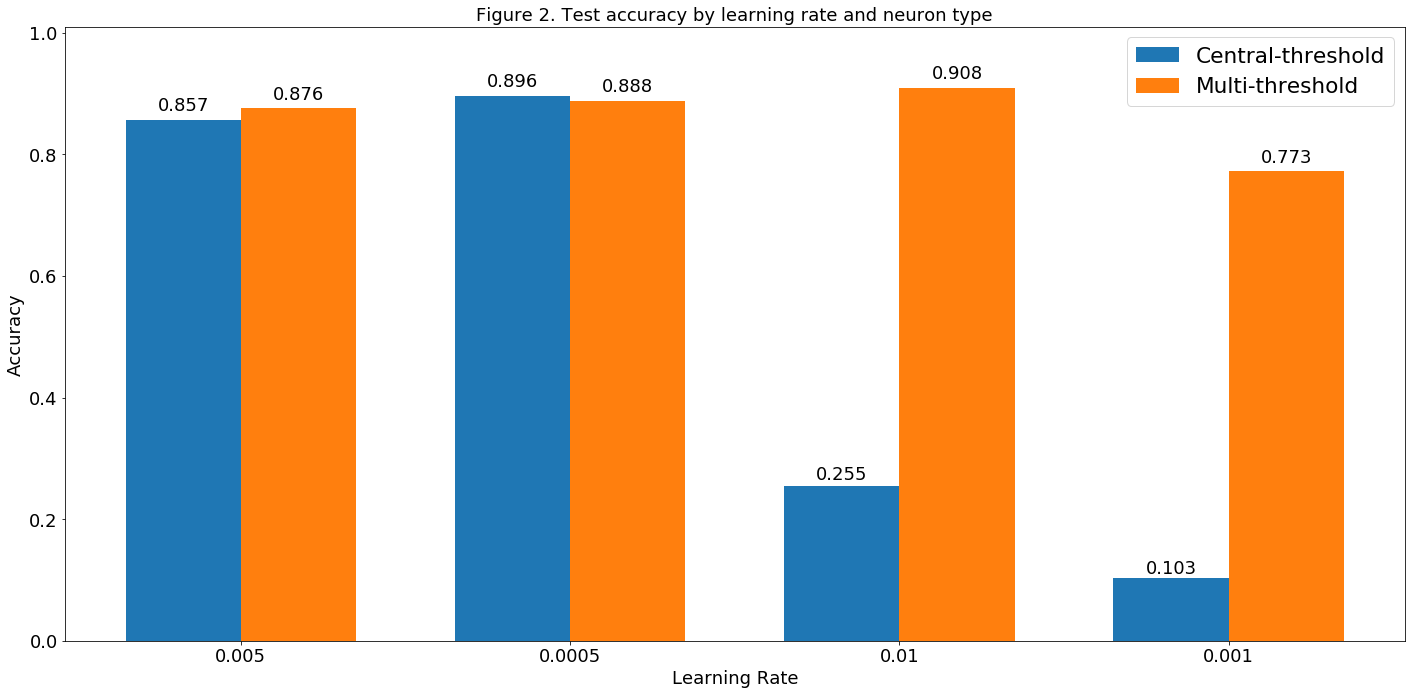

In [47]:
def bar_top_label(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.01 * height,
                f'{height:.3f}',
                ha='center', va='bottom')

width = 0.35


acc_central = {s.data['learning_rate']: s.data['accuracy'] for s in summaries if s.type == 'central'}
acc_multi = {s.data['learning_rate']: s.data['accuracy'] for s in summaries if s.type == 'multi'}
bar_central = plt.bar(range(len(acc_central)), acc_central.values(), width)
bar_multi = plt.bar([p + width for p in range(len(acc_multi))], acc_multi.values(), width)
plt.xticks([p + width / 2 for p in range(len(acc_multi))], {str(s.data['learning_rate']) for s in summaries})

bar_top_label(bar_central)
bar_top_label(bar_multi)

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend(['Central-threshold', 'Multi-threshold'])
plt.title('Figure 2. Test accuracy by learning rate and neuron type', fontsize=18);
plt.ylim((0, 1.01))
plt.tight_layout()
plt.savefig('accuracy_vs_rate_and_type.png')

0.0005
0.001
0.005
0.01


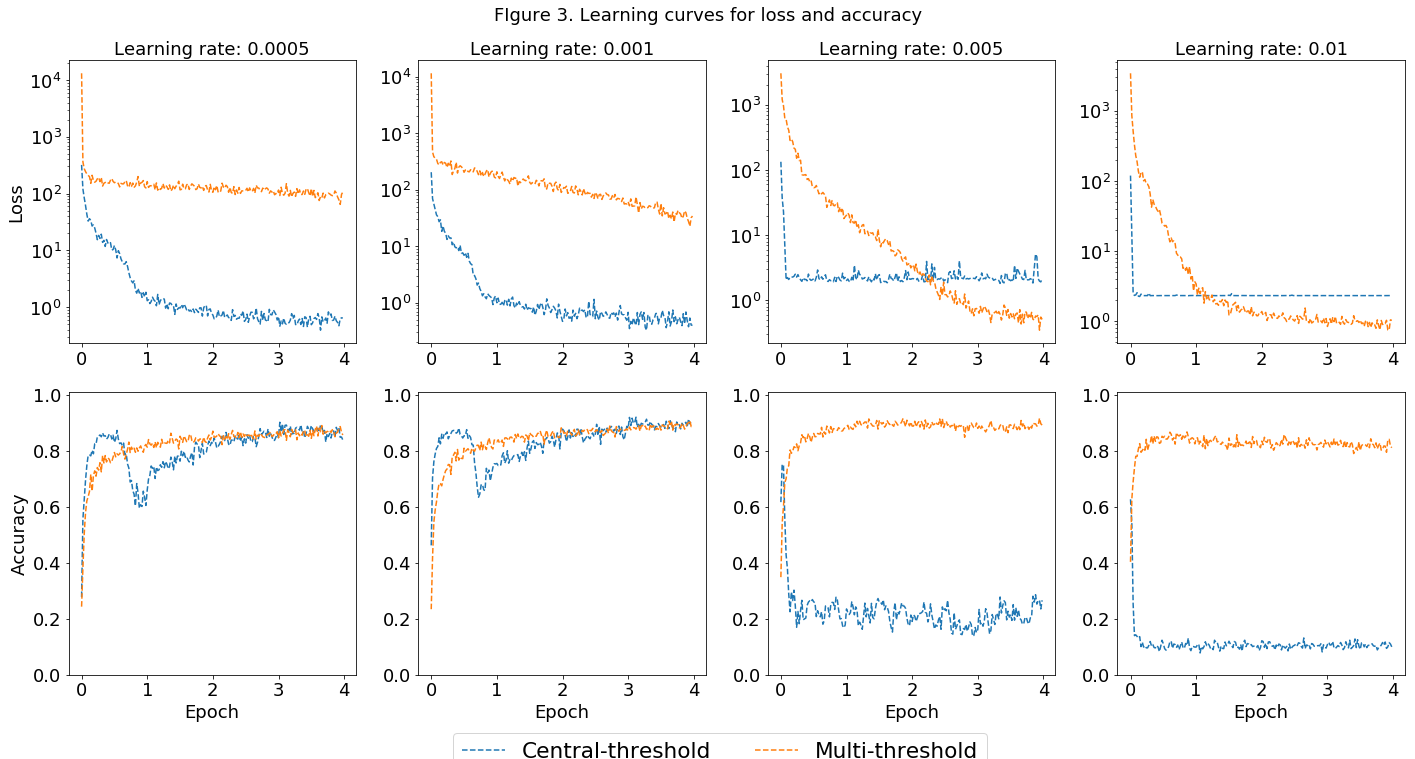

In [8]:
fig, axes = plt.subplots(2, 4)

for i, (learning_rate, grp_summary) in enumerate(groupby(summaries, key=lambda x: x.data['learning_rate'])):
    print(learning_rate)
    legend = []
    lines = []
    for summary in grp_summary:
        legend.append(summary.type)
        x = range(0, summary.data['n_examples'] * summary.data['n_epochs'], 1100)
        lines.append(axes[0, i].semilogy(x, summary.data['losses'], '--')[0])
        axes[1, i].plot(x, summary.data['accuracies'], '--')
    axes[1, i].set_ylim(0, 1.01)
    axes[0, i].set_title(f'Learning rate: {learning_rate}', fontsize=18)
    axes[1, i].set_xlabel('Epoch')
    axes[0, i].set_xticks([x * summary.data['n_examples'] for x in range(summary.data['n_epochs'] + 1)])
    axes[0, i].set_xticklabels(range(summary.data['n_epochs'] + 1))
    axes[1, i].set_xticks([x * summary.data['n_examples'] for x in range(summary.data['n_epochs'] + 1)])
    axes[1, i].set_xticklabels(range(summary.data['n_epochs'] + 1))

axes[0, 0].set_ylabel('Loss')
axes[1, 0].set_ylabel('Accuracy')
lgd = fig.legend(lines[:2], ['Central-threshold', 'Multi-threshold'], loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol=2)
tlt = fig.suptitle('FIgure 3. Learning curves for loss and accuracy', y=1.02)
fig.tight_layout()
fig.savefig('accuracy_and_loss_curves.png', bbox_extra_artists=(lgd, tlt), bbox_inches='tight');